# Keypoint Detection on Custom Dataset


### Your dataset should be in COCO keypoint detection format

In [7]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [8]:
#We are using the pre-trained Detectron2 model, as shown below.
cfg = get_cfg()

cfg.MODEL.DEVICE = "cpu"
# load the pre trained model from Detectron2 model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
# set confidence threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
# load model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
# create the predictor for pose estimation using the config
pose_detector = DefaultPredictor(cfg)

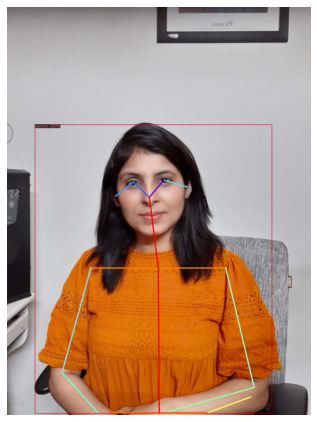

In [9]:
import matplotlib.pyplot as plt
im = cv2.imread("demo11.jpeg")

def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');

predictor = DefaultPredictor(cfg)
outputs = predictor(im)

v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

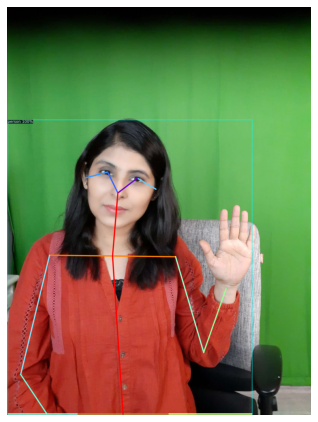

In [14]:
im = cv2.imread("demo2.jpeg")

predictor = DefaultPredictor(cfg)
outputs = predictor(im)

v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.9)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [5]:
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog
from detectron2.config import get_cfg


network_model = 'COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml'
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file(network_model))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(network_model)
cls = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
print('NetworkModel[%s] category:%d'%(network_model, len(cls)))
print(cls)

kname = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_names
print('keypoint_names')
print(kname)

krule = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_connection_rules
print('keypoint_connection_rules')
print(krule)

# Keypoint detection model has only 1 class category, 17 keypoints, and 14 keypoint connections.

NetworkModel[COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml] category:1
['person']
keypoint_names
('nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle')
keypoint_connection_rules
[('left_ear', 'left_eye', (102, 204, 255)), ('right_ear', 'right_eye', (51, 153, 255)), ('left_eye', 'nose', (102, 0, 204)), ('nose', 'right_eye', (51, 102, 255)), ('left_shoulder', 'right_shoulder', (255, 128, 0)), ('left_shoulder', 'left_elbow', (153, 255, 204)), ('right_shoulder', 'right_elbow', (128, 229, 255)), ('left_elbow', 'left_wrist', (153, 255, 153)), ('right_elbow', 'right_wrist', (102, 255, 224)), ('left_hip', 'right_hip', (255, 102, 0)), ('left_hip', 'left_knee', (255, 255, 77)), ('right_hip', 'right_knee', (153, 255, 204)), ('left_knee', 'left_ankle', (191, 255, 128)), ('right_knee', 'right_ankle', (255, 195, 77))]


In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
!python --version

Python 3.8.7


In [3]:
!pip show pyyaml

Name: PyYAML
Version: 5.1
Summary: YAML parser and emitter for Python
Home-page: https://github.com/yaml/pyyaml
Author: Kirill Simonov
Author-email: xi@resolvent.net
License: MIT
Location: d:\env_for_detectron\myvenv\lib\site-packages
Requires: 
Required-by: yacs, omegaconf, fvcore


In [4]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.8.0+cpu False


In [15]:
#!pip install git+https://github.com/facebookresearch/fvcore
#!pip install cython; pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
#!pip install iopath
#!pip install omegaconf==2.1.1
#import omegaconf
#!pip install pycocotools==2.0.2
#!pip install hydra-core
#!gcc --version
#!pip show cython

# Build Detectron2

In [6]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [10]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Run a Mask RCNN  detectron2 model on Custom Dataset

### 1st Step: Register your  dataset to detectron2

Register your dataset (i.e., tell detectron2 how to obtain your dataset).

In [11]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [12]:
from detectron2.data.datasets import register_coco_instances


register_coco_instances("hands_train", {}, "human_hand-project/train.json", "human_hand-project")

register_coco_instances("hands_test", {}, "human_hand-project/test.json", "human_hand-project")

In [13]:
from detectron2.data import MetadataCatalog

keypoint_names = ['a', 'b', 'c', 'd', 'e', 'f','g','h','i','j']
keypoint_flip_map = [('a', 'b'), ('c', 'd'), ('e', 'f'),('g','h'),('i','j')]

from detectron2.data import MetadataCatalog
classes = MetadataCatalog.get("hands_train").thing_classes = ["hand"]
print(classes)

['hand']


In [14]:

MetadataCatalog.get("hands_train").thing_classes = ["hand"]
MetadataCatalog.get("hands_train").thing_dataset_id_to_contiguous_id = {1:0}
MetadataCatalog.get("hands_train").keypoint_names = keypoint_names
MetadataCatalog.get("hands_train").keypoint_flip_map = keypoint_flip_map
MetadataCatalog.get("hands_train").evaluator_type="coco"


In [15]:
dataset_dicts = DatasetCatalog.get("hands_train")
dataset_dicts

[09/10 15:23:58 d2.data.datasets.coco]: Loaded 33 images in COCO format from human_hand-project/train.json


[{'file_name': 'human_hand-project\\img/01FETTCD70J6VBV5D7AD0HK4G4.jpeg',
  'height': 191,
  'width': 264,
  'image_id': 1,
  'annotations': [{'iscrowd': 0,
    'bbox': [108.98311711389744,
     33.150927706806975,
     31.268232226112282,
     36.433415662573175],
    'keypoints': [111.22024664862425,
     70.08434336938015,
     2,
     109.48311711389744,
     50.566445667043126,
     2,
     113.82592438421943,
     37.120772878117066,
     2,
     125.98579799431701,
     34.95211757785739,
     2,
     132.93428300023413,
     33.650927706806975,
     2,
     135.97423483626352,
     37.120772878117066,
     2,
     140.7513493400097,
     44.92794519547338,
     2,
     133.36855710066834,
     53.60256639651205,
     2,
     126.85434619518537,
     63.578377468601154,
     2,
     124.24866845959019,
     68.34941251096166,
     2],
    'category_id': 0,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0,
    'bbox': [264, 191, -264, -191],
    'keypoints': [0.5,
     0

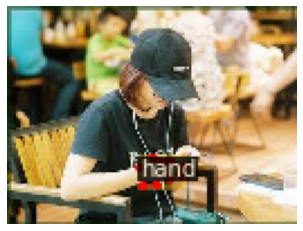

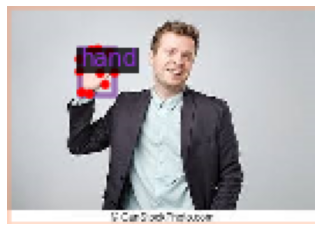

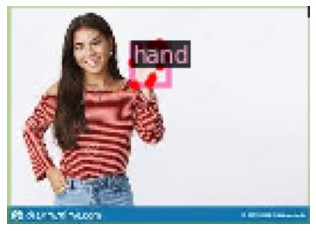

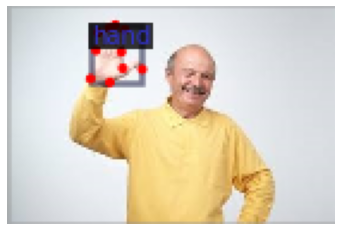

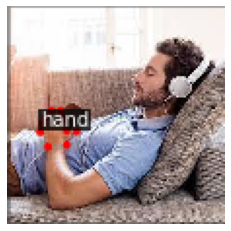

In [29]:
# To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the dataset:
import random
from detectron2.utils.visualizer import Visualizer

hands_metadata = MetadataCatalog.get("hands_train")

def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(), plt.imshow(im), plt.axis('off');

for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=hands_metadata, scale=0.5)   
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Training

In [20]:

from detectron2.engine import DefaultTrainer

cfg = get_cfg()
#cfg.MODEL.DEVICE = "cpu"


cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("hands_train",)


#cfg.DATASETS.TEST = ("hand_test",)  #Dataset 'hand_test' is empty in my case
cfg.DATASETS.TEST = ()

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 2000   # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   #128   # faster, and good enough for this toy dataset (default: 512)

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # hand
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 10
cfg.TEST.KEYPOINT_OKS_SIGMAS = np.ones((10, 1), dtype=float).tolist()


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)    #CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


'\nfrom detectron2.engine import DefaultTrainer\n\ncfg = get_cfg()\n#cfg.MODEL.DEVICE = "cpu"\n\n\ncfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))\ncfg.DATASETS.TRAIN = ("hands_train",)\n\n\n#cfg.DATASETS.TEST = ("hand_test",)  #Dataset \'hand_test\' is empty in my case\ncfg.DATASETS.TEST = ()\n\ncfg.DATALOADER.NUM_WORKERS = 2\ncfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")\n\ncfg.SOLVER.IMS_PER_BATCH = 2\ncfg.SOLVER.BASE_LR = 0.00025  # pick a good LR\ncfg.SOLVER.MAX_ITER = 2000   # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset\ncfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   #128   # faster, and good enough for this toy dataset (default: 512)\n\ncfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # hand\ncfg.MODEL.RETINANET.NUM_CLASSES = 1\ncfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 10\ncfg.TEST.KEYPOINT_OKS_SIGMAS = np.ones((10, 1), dtyp

In [218]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

#We are using the pre-trained Detectron2 model, as shown below.
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"

# load the pre trained model from Detectron2 model zoo
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 # set a custom testing threshold


def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');


predictor = DefaultPredictor(cfg)
#im = cv2.imread("waving.jpg")
#im = cv2.imread("test.jpeg")
im = cv2.imread("test1.jpeg")
outputs = predictor(im)
print(outputs)
o = outputs["instances"]
print("###########################################################")



idxofClass = [i for i, x in enumerate(list(outputs['instances'].pred_classes)) if x == 15]

#Create new class, boxes, scores & masks
classes = o.pred_classes[idxofClass]
scores = o.scores[idxofClass]
boxes = o.pred_boxes[idxofClass]
#masks = o.pred_masks[idxofClass]

#Define new instance and set the new values to new instance. Note: detectron2 module provides this method set.
obj = detectron2.structures.Instances(image_size=(480, 640))

obj.set('pred_classes', classes)
obj.set('scores', scores)
obj.set('pred_boxes', boxes)
#obj.set('pred_masks', masks)

out = v.draw_instance_predictions(obj.to("cpu"))


Skip loading parameter 'proposal_generator.rpn_head.conv.weight' to the model due to incompatible shapes: (256, 256, 3, 3) in the checkpoint but (1024, 1024, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.conv.bias' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (3, 256, 1, 1) in the checkpoint but (15, 1024, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.weight' to the model due to incompatible s

{'instances': Instances(num_instances=8, image_height=190, image_width=266, fields=[pred_boxes: Boxes(tensor([[2.0789e+02, 9.0520e+01, 2.0864e+02, 9.2588e+01],
        [2.1299e+02, 1.3439e+01, 2.2669e+02, 1.3439e+01],
        [1.7682e+02, 3.2406e+00, 2.0708e+02, 3.3040e+00],
        [1.1089e+02, 7.6279e+01, 1.1180e+02, 8.0661e+01],
        [1.6959e+02, 7.4263e+00, 2.0160e+02, 8.3250e+00],
        [2.3533e+02, 5.7735e+01, 2.3533e+02, 5.9038e+01],
        [2.8132e-02, 5.4759e+01, 2.8839e-02, 6.2652e+01],
        [2.0509e+02, 8.8143e+00, 2.2540e+02, 1.0631e+01]])), scores: tensor([1., 1., 1., 1., 1., 1., 1., 1.]), pred_classes: tensor([0, 0, 0, 0, 0, 0, 0, 0])])}
###########################################################


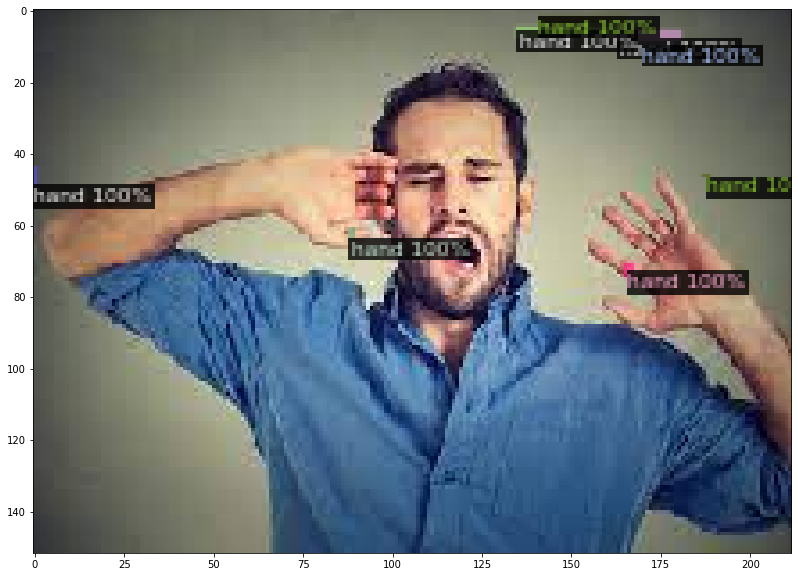

In [220]:
v = Visualizer(im[:, :, ::-1],
                   metadata=hands_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()